In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import sklearn.linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression


In [ ]:
data = pd.read_csv('Health.csv')
print(data.head(), "\n")
print(data.describe())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520 

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


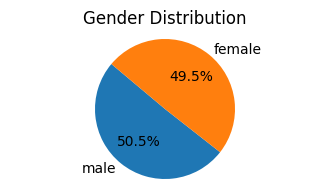

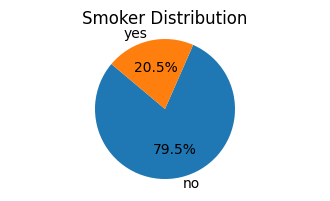

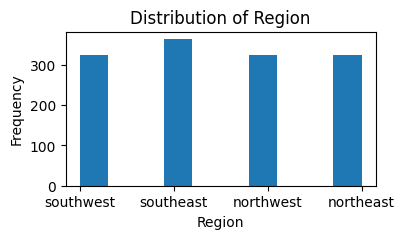

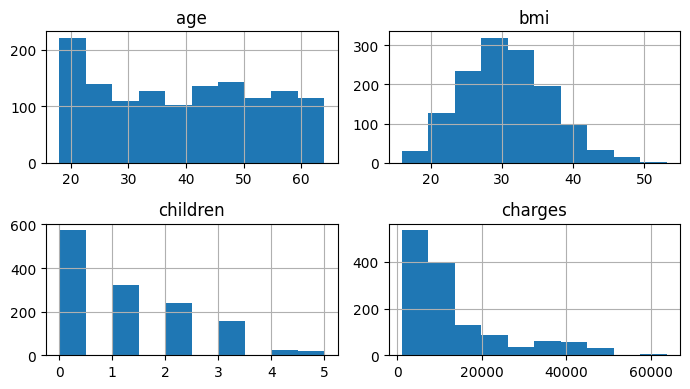

In [ ]:
counts = data['sex'].value_counts()
plt.figure(figsize=(4, 2))
plt.pie(counts, labels= counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution')
plt.axis('equal')
plt.show()

counts = data['smoker'].value_counts()
plt.figure(figsize=(4, 2))
plt.pie(counts, labels= counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Smoker Distribution')
plt.axis('equal')
plt.show()

plt.figure(figsize=(4, 2))
reg = data['region']
plt.hist(reg)
plt.title('Distribution of Region')
plt.xlabel('Region')
plt.ylabel('Frequency')
plt.show()

data.hist(figsize=(7, 4))
plt.tight_layout()
plt.show()




In [ ]:
X = data[['age', 'sex', 'region', 'bmi', 'smoker']]
y = data['charges']

# Convert categorical variables to dummy variables
X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

Training set size: 936 samples
Test set size: 402 samples


In [ ]:
model = LinearRegression(fit_intercept=True)
model.fit(X_train, y_train)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Coefficients: [  263.60975408   348.59839683   121.89750789  -475.20322653
  -999.21392344  -955.39436792 23661.76403755]
Intercept: -11989.19305869596


In [ ]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
print(f"Training Mean Squared Error: {train_mse:.2f}")

test_mse = mean_squared_error(y_test, y_test_pred)
print(f"Testing Mean Squared Error: {test_mse:.2f}")


Training Mean Squared Error: 37993154.48
Testing Mean Squared Error: 34243197.66


In [ ]:
df = pd.read_csv('Lung.csv')
print(df.head())
print(df.describe())

  GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0      M   69        1               2        2              1   
1      M   74        2               1        1              1   
2      F   59        1               1        1              2   
3      M   63        2               2        2              1   
4      F   63        1               2        1              1   

   CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                1         2         1         2                  2         2   
1                2         2         2         1                  1         1   
2                1         2         1         2                  1         2   
3                1         1         1         1                  2         1   
4                1         1         1         2                  1         2   

   SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN LUNG_CANCER  
0                    2                      

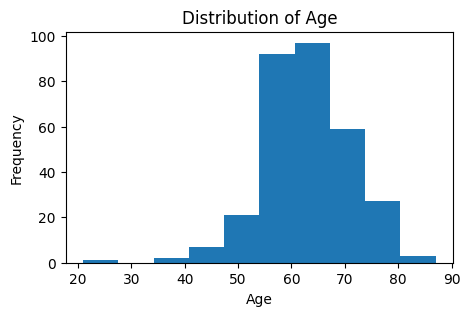

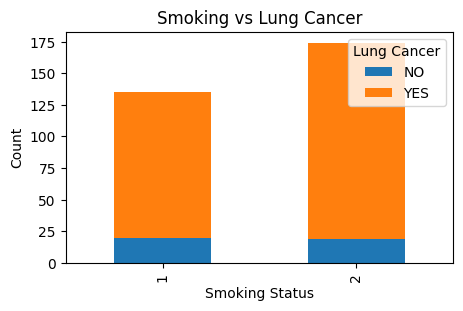

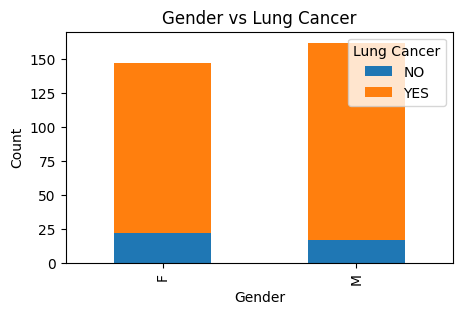

In [ ]:
plt.figure(figsize=(5, 3))
plt.hist(df['AGE'], bins=10)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

smoking_counts = df.groupby(['SMOKING', 'LUNG_CANCER']).size().unstack()
smoking_counts.plot(kind='bar', stacked=True, figsize=(5, 3))
plt.title('Smoking vs Lung Cancer')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.legend(title='Lung Cancer')
plt.show()

gender_counts = df.groupby(['GENDER', 'LUNG_CANCER']).size().unstack()
gender_counts.plot(kind='bar', stacked=True, figsize=(5, 3))
plt.title('Gender vs Lung Cancer')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Lung Cancer')
plt.show()



In [ ]:
df['GENDER'] = df['GENDER'].apply(lambda x: 1 if x == 'M' else 0)
df['LUNG_CANCER'] = df['LUNG_CANCER'].apply(lambda x: 1 if x == 'YES' else 0)


X = df.drop('LUNG_CANCER', axis=1)
y = df['LUNG_CANCER']
# print("class distribution:\n", y.value_counts())

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# print("Training set size:", X_train.shape)
# print("Test set size:", X_test.shape)
# print("Training set size:", y_train.shape)
# print("Test set size:", y_test.shape)

model = LogisticRegression(random_state=0, solver='liblinear')
model.fit(X_train, y_train)


y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)


accuracy_train = (y_pred_train==y_train).mean()
accuracy_test = (y_pred_test==y_test).mean()

print("Training Accuracy:", accuracy_train)
print("Test Accuracy:", accuracy_test)

print("Classification Report (Test Set):\n", classification_report(y_test, y_pred_test))
print("Classification Report (Train Set):\n", classification_report(y_train, y_pred_train))


Training Accuracy: 0.9120370370370371
Test Accuracy: 0.8817204301075269
Classification Report (Test Set):
               precision    recall  f1-score   support

           0       1.00      0.27      0.42        15
           1       0.88      1.00      0.93        78

    accuracy                           0.88        93
   macro avg       0.94      0.63      0.68        93
weighted avg       0.90      0.88      0.85        93

Classification Report (Train Set):
               precision    recall  f1-score   support

           0       0.86      0.25      0.39        24
           1       0.91      0.99      0.95       192

    accuracy                           0.91       216
   macro avg       0.89      0.62      0.67       216
weighted avg       0.91      0.91      0.89       216

